In [1]:
from typing import List, Tuple
from pathlib import Path


import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import plotly.express as px
import tqdm
tqdm.tqdm.pandas()

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
from market_data import MarketData

In [3]:
trading_days_per_year = 252

# Parameters

In [4]:
start_date = '2017-01-01'

In [5]:
analysis_dir = Path('analysis')

# Pair selection criteria
- Acceptable volatility
- Pass stationary test
- Spread is stationary
- High Cointegration's p-value
- High correlation
- Low Half life
- High number of reversion
- High magnitude of spread
- mean reversion (Hurst exponent)
- Mature asset (age more than 5 years)
- VaR

# Cointegration

In [6]:
cointegration_df = pd.read_csv(analysis_dir / 'cointegration.csv')
cointegration_df


,left_symbol,right_symbol,cointegration,cointegration_test_period
0,USDNZD,USDJPY,0.785850,4110
1,USDNZD,HKDUSD,0.505716,4053
2,USDNZD,USDHKD,0.466705,4057
3,USDNZD,USDGBP,0.922822,4062
4,USDNZD,USDEUR,0.920139,3320
...,...,...,...,...
556,NOKUSD,USDSGD,0.921989,3979
557,NOKUSD,AUDUSD,0.989823,4076
558,USDSEK,USDSGD,0.825440,3936
559,USDSEK,AUDUSD,0.827390,3912


In [7]:
min_test_year = 5
cointegration_df = cointegration_df[cointegration_df['cointegration_test_period'] >= min_test_year * trading_days_per_year]
cointegration_df

,left_symbol,right_symbol,cointegration,cointegration_test_period
0,USDNZD,USDJPY,0.785850,4110
1,USDNZD,HKDUSD,0.505716,4053
2,USDNZD,USDHKD,0.466705,4057
3,USDNZD,USDGBP,0.922822,4062
4,USDNZD,USDEUR,0.920139,3320
...,...,...,...,...
556,NOKUSD,USDSGD,0.921989,3979
557,NOKUSD,AUDUSD,0.989823,4076
558,USDSEK,USDSGD,0.825440,3936
559,USDSEK,AUDUSD,0.827390,3912


In [8]:
cointegration_df

,left_symbol,right_symbol,cointegration,cointegration_test_period
0,USDNZD,USDJPY,0.785850,4110
1,USDNZD,HKDUSD,0.505716,4053
2,USDNZD,USDHKD,0.466705,4057
3,USDNZD,USDGBP,0.922822,4062
4,USDNZD,USDEUR,0.920139,3320
...,...,...,...,...
556,NOKUSD,USDSGD,0.921989,3979
557,NOKUSD,AUDUSD,0.989823,4076
558,USDSEK,USDSGD,0.825440,3936
559,USDSEK,AUDUSD,0.827390,3912


In [9]:
cointegration_df.sort_values('cointegration', ascending=False, inplace=True)

/var/folders/dr/syp1qtg16lb2mq85d1_56p2h0000gn/T/ipykernel_52247/4089212689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cointegration_df.sort_values('cointegration', ascending=False, inplace=True)


In [10]:
cointegration_df

,left_symbol,right_symbol,cointegration,cointegration_test_period
291,SGDUSD,USDCNY,1.000000,3369
285,SGDUSD,GBPUSD,1.000000,3900
301,SGDUSD,USDDKK,1.000000,2252
300,SGDUSD,CNYUSD,1.000000,3694
299,SGDUSD,INRUSD,1.000000,3906
...,...,...,...,...
267,JPYUSD,CHFUSD,0.019865,4056
261,JPYUSD,SGDUSD,0.016562,3926
41,USDJPY,SGDUSD,0.016279,3932
271,JPYUSD,XAGUSD,0.008613,2746


# Correlation

# Market Data

In [11]:
market_data = MarketData('dataset')


In [12]:
symbols = pd.concat([cointegration_df['left_symbol'], cointegration_df['right_symbol']]).drop_duplicates()
symbols

291    SGDUSD
540    USDDKK
192    USDCHF
132    USDGBP
40     USDJPY
162    USDEUR
441    USDZAR
486    USDINR
397    USDMXN
408    CHFUSD
552    SEKUSD
11     USDNZD
502    USDNOK
433    USDCNY
461    ZARUSD
249    USDAUD
346    NZDUSD
65     HKDUSD
557    NOKUSD
369    EURUSD
323    GBPUSD
549    DKKUSD
216    USDCAD
560    USDSGD
518    XAUUSD
375    CADUSD
528    INRUSD
559    USDSEK
512    MXNUSD
96     USDHKD
473    XAGUSD
537    CNYUSD
284    JPYUSD
307    AUDUSD
dtype: object

In [13]:
price_df = market_data.read_batch(symbols)
price_df = price_df.loc[start_date:]
price_df

100%|██████████| 34/34 [00:00<00:00, 106.58it/s]


,SGDUSD,USDDKK,USDCHF,USDGBP,USDJPY,USDEUR,USDZAR,USDINR,USDMXN,CHFUSD,SEKUSD,USDNZD,USDNOK,USDCNY,ZARUSD,USDAUD,NZDUSD,HKDUSD,NOKUSD,EURUSD,GBPUSD,DKKUSD,USDCAD,USDSGD,XAUUSD,CADUSD,INRUSD,USDSEK,MXNUSD,USDHKD,XAGUSD,CNYUSD,JPYUSD,AUDUSD
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-01,0.689560,NaN,1.021610,0.811100,117.409,0.95340,13.72980,68.0800,20.67760,0.978450,0.109860,1.442100,8.63440,6.9445,0.072580,1.394300,0.69164,0.128910,0.115750,1.04867,1.23219,0.141020,1.34057,1.44940,NaN,0.745600,0.014690,9.09500,0.048300,7.75668,NaN,NaN,0.008510,0.71680
2017-01-02,0.689130,NaN,1.028240,0.813460,118.152,0.96060,13.76260,68.2980,20.72581,0.972440,0.108980,1.443000,8.66610,6.9571,0.072600,1.387100,0.69280,0.128910,0.115360,1.04018,1.22881,0.140000,1.34306,1.45044,1148.09,0.744510,0.014640,9.17419,0.048230,7.75630,15.9260,NaN,0.008460,0.72049
2017-01-03,0.691520,NaN,1.025820,0.814420,117.688,0.95790,13.63350,68.1680,21.11500,0.974760,0.109550,1.441300,8.62913,6.9428,0.073260,1.375900,0.69376,0.128930,0.115830,1.04380,1.22769,0.140380,1.33747,1.44527,1165.31,0.747330,0.014670,9.12580,0.047320,7.75546,16.4110,NaN,0.008490,0.72654
2017-01-04,0.697370,NaN,1.019160,0.812400,116.612,0.95175,13.68374,67.9180,21.42060,0.981220,0.110250,1.433900,8.57380,6.8847,0.072980,1.371000,0.69741,0.128960,0.116580,1.05046,1.23037,0.141260,1.32990,1.43384,1172.69,0.751650,0.014720,9.06637,0.046650,7.75425,16.5380,NaN,0.008570,0.72927
2017-01-05,0.697400,NaN,1.010640,0.807250,115.968,0.94300,13.62730,67.9720,21.34310,0.989360,0.110940,1.423200,8.49210,6.9251,0.073350,1.361800,0.70254,0.128930,0.117710,1.06005,1.23863,0.142600,1.32464,1.43335,1178.12,0.754680,0.014710,9.01045,0.046820,7.75470,16.4730,NaN,0.008620,0.73424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-19,0.700633,7.62027,1.005700,0.892710,149.909,1.02440,18.34150,83.0230,20.15284,0.993729,0.088973,1.776990,10.63783,7.2388,0.054432,1.603900,0.56240,0.127402,0.093947,0.97611,1.12010,0.131182,1.38017,1.42713,1626.20,0.724480,0.012043,11.23370,0.049608,7.84870,18.3082,0.138106,0.006670,0.62342
2022-10-20,0.700977,7.61476,1.005780,0.892810,150.356,1.02365,18.31490,82.7938,20.03860,0.994150,0.088512,1.768000,10.67975,7.2458,0.054422,1.595810,0.56550,0.127393,0.093568,0.97686,1.11997,0.131315,1.37833,1.42643,1621.54,0.725440,0.012076,11.28822,0.049859,7.84939,18.5192,0.137973,0.006650,0.62657
2022-10-21,0.706364,7.54160,0.997511,0.884486,147.650,1.01390,18.07399,82.5135,19.90650,1.001890,0.089267,1.726579,10.25574,7.2427,0.053116,1.538580,0.56880,0.127379,0.088582,0.98497,1.13010,0.132584,1.35565,1.41470,1656.60,0.729102,0.012111,11.15896,0.050191,7.84950,19.4062,0.137859,0.006771,0.62173


# Correlation

In [14]:


corr_df = price_df.corr(min_periods=trading_days_per_year * 5)
corr_df

,SGDUSD,USDDKK,USDCHF,USDGBP,USDJPY,USDEUR,USDZAR,USDINR,USDMXN,CHFUSD,SEKUSD,USDNZD,USDNOK,USDCNY,ZARUSD,USDAUD,NZDUSD,HKDUSD,NOKUSD,EURUSD,GBPUSD,DKKUSD,USDCAD,USDSGD,XAUUSD,CADUSD,INRUSD,USDSEK,MXNUSD,USDHKD,XAGUSD,CNYUSD,JPYUSD,AUDUSD
SGDUSD,1.000000,NaN,-0.295279,-0.564307,-0.293711,-0.548110,-0.375246,-0.211949,-0.278998,0.323085,0.441614,-0.433275,-0.433798,-0.479647,0.324065,-0.408229,0.425895,-0.048653,0.441632,0.555495,0.570953,0.553885,-0.444254,-0.653598,0.017017,0.451476,0.201072,-0.441398,0.270636,0.040151,0.192207,0.472577,0.292371,0.399939
USDDKK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
USDCHF,-0.295279,NaN,1.000000,0.494645,0.200875,0.460517,-0.154434,-0.362290,-0.211339,-0.998901,-0.347707,0.274626,0.043063,0.530232,0.187020,0.243425,-0.293036,-0.526934,0.038705,-0.467418,-0.506225,-0.480448,0.468341,0.436901,-0.768328,-0.484377,0.365928,0.305850,0.319261,0.549362,-0.799933,-0.520798,-0.202879,-0.242998
USDGBP,-0.564307,NaN,0.494645,1.000000,0.583837,0.876520,0.560238,0.344622,0.241064,-0.524292,-0.782757,0.763489,0.697115,0.758326,-0.476935,0.662893,-0.750408,-0.211859,-0.674537,-0.874360,-0.997132,-0.876840,0.652260,0.847358,-0.077401,-0.667729,-0.318992,0.806060,-0.225920,0.232939,-0.386922,-0.758346,-0.550200,-0.659734
USDJPY,-0.293711,NaN,0.200875,0.583837,1.000000,0.734084,0.447887,0.495068,0.087639,-0.218590,-0.605955,0.475364,0.552268,0.090053,-0.394355,0.260445,-0.491192,-0.431327,-0.470311,-0.714497,-0.555867,-0.698212,-0.015348,0.391620,0.145340,-0.000350,-0.451624,0.631001,-0.023012,0.453447,0.129220,-0.085285,-0.995683,-0.282875
USDEUR,-0.548110,NaN,0.460517,0.876520,0.734084,1.000000,0.589291,0.425764,0.287498,-0.485415,-0.866756,0.703753,0.761618,0.577663,-0.524263,0.624586,-0.720198,-0.222577,-0.701812,-0.997499,-0.866776,-0.996015,0.501162,0.805082,0.030810,-0.516095,-0.401542,0.872769,-0.202558,0.243665,-0.144620,-0.573975,-0.725193,-0.633361
USDZAR,-0.375246,NaN,-0.154434,0.560238,0.447887,0.589291,1.000000,0.838935,0.719554,0.125742,-0.734813,0.802108,0.895226,0.408230,-0.917150,0.768680,-0.801170,0.156154,-0.897045,-0.597848,-0.549875,-0.598520,0.405834,0.561772,0.600260,-0.397034,-0.830281,0.752871,-0.725283,-0.139645,0.172481,-0.416652,-0.414721,-0.761930
USDINR,-0.211949,NaN,-0.362290,0.344622,0.495068,0.425764,0.838935,1.000000,0.598853,0.364196,-0.637120,0.621483,0.746173,0.116350,-0.798627,0.573986,-0.644278,0.094185,-0.777051,-0.429334,-0.318376,-0.424665,0.092818,0.295581,0.764902,-0.095584,-0.997519,0.680243,-0.641384,-0.089040,0.459394,-0.120969,-0.468535,-0.591060
USDMXN,-0.278998,NaN,-0.211339,0.241064,0.087639,0.287498,0.719554,0.598853,1.000000,0.206035,-0.398952,0.450688,0.625793,0.140848,-0.641100,0.514582,-0.441999,0.435280,-0.631076,-0.292110,-0.236796,-0.293992,0.346999,0.432406,0.501515,-0.328863,-0.606402,0.387746,-0.993909,-0.427978,0.205431,-0.125639,-0.078600,-0.483769
CHFUSD,0.323085,NaN,-0.998901,-0.524292,-0.218590,-0.485415,0.125742,0.364196,0.206035,1.000000,0.376492,-0.307517,-0.072965,-0.543874,-0.164394,-0.274853,0.331306,0.547453,-0.010913,0.498314,0.537247,0.508814,-0.498064,-0.473228,0.772000,0.508058,-0.369552,-0.339826,-0.312379,-0.567131,0.822445,0.535539,0.225022,0.274350


In [15]:
corr_pair_df = corr_df.melt(ignore_index=False, var_name='right_symbol', value_name='correlation')
corr_pair_df.index.name = 'left_symbol'
corr_pair_df = corr_pair_df.reset_index()
corr_pair_df = corr_pair_df.sort_values('correlation')
corr_pair_df = corr_pair_df.dropna(subset=['correlation'])
corr_pair_df

,left_symbol,right_symbol,correlation
607,USDHKD,HKDUSD,-0.999776
1003,HKDUSD,USDHKD,-0.999776
1067,USDCNY,CNYUSD,-0.999412
473,CNYUSD,USDCNY,-0.999412
308,USDCHF,CHFUSD,-0.998901
...,...,...,...
980,MXNUSD,MXNUSD,1.000000
1015,USDHKD,USDHKD,1.000000
1050,XAGUSD,XAGUSD,1.000000
560,NZDUSD,NZDUSD,1.000000


# Pre-Selection

- Cointegration

In [16]:
pair_df = cointegration_df.merge(corr_pair_df, on=['left_symbol', 'right_symbol'], how='left')
pair_df


,left_symbol,right_symbol,cointegration,cointegration_test_period,correlation
0,SGDUSD,USDCNY,1.000000,3369,-0.479647
1,SGDUSD,GBPUSD,1.000000,3900,0.570953
2,SGDUSD,USDDKK,1.000000,2252,NaN
3,SGDUSD,CNYUSD,1.000000,3694,0.472577
4,SGDUSD,INRUSD,1.000000,3906,0.201072
...,...,...,...,...,...
555,JPYUSD,CHFUSD,0.019865,4056,0.225022
556,JPYUSD,SGDUSD,0.016562,3926,0.292371
557,USDJPY,SGDUSD,0.016279,3932,-0.293711
558,JPYUSD,XAGUSD,0.008613,2746,-0.129504


In [17]:

selected_pair_df = pair_df[
    (pair_df['cointegration'] > 0.95)
    & (~np.isclose(pair_df['cointegration'], 1.0))
]

selected_pair_df

,left_symbol,right_symbol,cointegration,cointegration_test_period,correlation
35,USDNOK,NOKUSD,0.999980,3926,-0.986901
36,USDCNY,CNYUSD,0.999796,3465,-0.999412
37,ZARUSD,INRUSD,0.999783,3932,0.796026
38,ZARUSD,USDINR,0.999673,3959,-0.798627
39,USDNZD,SEKUSD,0.997444,3821,-0.886660
40,USDAUD,USDNOK,0.996808,3905,0.859351
41,NZDUSD,SEKUSD,0.996079,3661,0.906466
42,USDCHF,XAGUSD,0.995753,2711,-0.799933
43,USDCHF,XAUUSD,0.995419,3121,-0.768328
44,CHFUSD,XAGUSD,0.994891,2737,0.822445


# Spread 

In [18]:
def calculate_alpha_beta(left_prices: pd.Series, right_prices: pd.Series) -> Tuple[float]:
    # log prices
    left_prices = np.log(left_prices)
    right_prices = np.log(right_prices)


    regressor = LinearRegression(fit_intercept=False)
    regressor.fit(left_prices.values.reshape(-1, 1), right_prices.values.reshape(-1, 1))
    
    alpha = regressor.intercept_[0]
    beta = regressor.coef_[0][0]
    
    return alpha, beta

In [19]:
def calculate_adjusted_price(prices: pd.Series, alpha: float, beta: float, return_log_price: bool = False) -> pd.Series:
    log_prices = np.log(prices)
    adjusted_log_prices = (alpha + beta * log_prices)
    if return_log_price:
        return adjusted_log_prices
    else:
        return np.exp(adjusted_log_prices)

In [20]:
def create_alpha_beta(pair: pd.Series) -> dict:

    left_symbol = pair['left_symbol']
    right_symbol = pair['right_symbol']

    df = price_df[[left_symbol, right_symbol]].dropna(how='any')

    left_prices = df[left_symbol]
    right_prices = df[right_symbol]

    alpha, beta = calculate_alpha_beta(left_prices, right_prices)

    return {'alpha': alpha, 'beta': beta}

In [21]:

selected_pair_df[['alpha', 'beta']] = selected_pair_df.apply(create_alpha_beta, axis=1, result_type='expand')
selected_pair_df

/var/folders/dr/syp1qtg16lb2mq85d1_56p2h0000gn/T/ipykernel_52247/151563467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_pair_df[['alpha', 'beta']] = selected_pair_df.apply(create_alpha_beta, axis=1, result_type='expand')
/var/folders/dr/syp1qtg16lb2mq85d1_56p2h0000gn/T/ipykernel_52247/151563467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_pair_df[['alpha', 'beta']] = selected_pair_df.apply(create_alpha_beta, axis=1, result_type='expand')


,left_symbol,right_symbol,cointegration,cointegration_test_period,correlation,alpha,beta
35,USDNOK,NOKUSD,0.999980,3926,-0.986901,0.034895,-1.017268
36,USDCNY,CNYUSD,0.999796,3465,-0.999412,-0.001807,-0.999223
37,ZARUSD,INRUSD,0.999783,3932,0.796026,-3.869933,0.147223
38,ZARUSD,USDINR,0.999673,3959,-0.798627,3.869098,-0.147442
39,USDNZD,SEKUSD,0.997444,3821,-0.886660,-1.754840,-1.146984
40,USDAUD,USDNOK,0.996808,3905,0.859351,1.820381,1.070854
41,NZDUSD,SEKUSD,0.996079,3661,0.906466,-1.752806,1.157699
42,USDCHF,XAGUSD,0.995753,2711,-0.799933,2.753769,-4.451238
43,USDCHF,XAUUSD,0.995419,3121,-0.768328,7.182909,-3.555472
44,CHFUSD,XAGUSD,0.994891,2737,0.822445,2.752931,4.566949


# Spread Stationary Test

In [22]:
def spread_stationary_test(pair: pd.Series) -> dict:
    left_symbol = pair['left_symbol']
    right_symbol = pair['right_symbol']
    alpha = pair['alpha']
    beta = pair['beta']

    df = price_df[[left_symbol, right_symbol]].dropna(how='any')

    left_prices = df[left_symbol]
    right_prices = df[right_symbol]

    adjusted_right_prices = calculate_adjusted_price(right_prices, alpha, beta)

    spread = left_prices - adjusted_right_prices

    adf_result = sm.tsa.stattools.adfuller(spread)
    adf_pvalue = adf_result[1]

    return {'adf_pvalue': adf_pvalue}

In [23]:
def plot_spread(left_symbol: str, right_symbol: str):

    df = price_df[[left_symbol, right_symbol]].dropna(how='any')
    left_prices = df[left_symbol]
    right_prices = df[right_symbol]

    alpha, beta = calculate_alpha_beta(left_prices, right_prices)
    adjusted_left_prices = calculate_adjusted_price(left_prices, alpha=alpha, beta=beta)
    df['adjusted_left_price'] = adjusted_left_prices


    fig, (price_ax, spread_ax) = plt.subplots(2, 1, figsize=(16, 9), sharex=True)
    df.plot(y=['adjusted_left_price', right_symbol], ax=price_ax)
    price_ax.legend([left_symbol, right_symbol])

    residual = np.log(df[right_symbol]) - np.log(df['adjusted_left_price'])
    spread_ax.axhline(0.0, color='black', linestyle='--')
    residual.plot(ax=spread_ax, color='red')


# Half-life

In [24]:
def half_life(series: pd.Series) -> float:
    lag = 1
    lagged = series.shift(lag).fillna(0)
    delta = series - lagged
    delta[0] = 0
    model = sm.OLS(delta, lagged)
    results = model.fit()
    half_life = -np.log(2) / results.params[0]
    return half_life

def calculate_spread_half_life(pair: pd.Series) -> float:

    left_symbol = pair['left_symbol']
    right_symbol = pair['right_symbol']
    df = price_df[[left_symbol, right_symbol]].dropna(how='any')
    left_prices = df[left_symbol]
    right_prices = df[right_symbol]
    
    adjusted_left_prices = calculate_adjusted_price(left_prices, alpha=pair['alpha'], beta=pair['beta'], return_log_price=False)

    spread = right_prices - adjusted_left_prices

    spread = spread + spread.min() + 1

    return half_life(spread)


def calculate_half_life(prices: pd.Series) -> float:
    prices = prices.dropna(how='any')
    return half_life(prices)


In [25]:
price_half_lifes = price_df.apply(calculate_half_life, axis=0, result_type='expand')

selected_pair_df['left_half_life'] = selected_pair_df['left_symbol'].map(price_half_lifes)
selected_pair_df['right_half_life'] = selected_pair_df['right_symbol'].map(price_half_lifes)
selected_pair_df['spread_half_life'] = selected_pair_df.apply(calculate_spread_half_life, axis=1)


/var/folders/dr/syp1qtg16lb2mq85d1_56p2h0000gn/T/ipykernel_52247/1768849218.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_pair_df['left_half_life'] = selected_pair_df['left_symbol'].map(price_half_lifes)
/var/folders/dr/syp1qtg16lb2mq85d1_56p2h0000gn/T/ipykernel_52247/1768849218.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_pair_df['right_half_life'] = selected_pair_df['right_symbol'].map(price_half_lifes)
/var/folders/dr/syp1qtg16lb2mq85d1_56p2h0000gn/T/ipykernel_52247/1768849

# Hurst Exponent

In [26]:
def hurst(prices: pd.Series, max_lag=100) -> float:
    prices = prices.to_numpy()
    lags = range(2, max_lag)

    tau = [np.sqrt(np.std(np.subtract(prices[lag:], prices[:-lag]))) for lag in lags]
    poly = np.polyfit(np.log(lags), np.log(tau), 1)
    return poly[0] * 2.0
def calculate_hurst_exponent(prices: pd.Series) -> float:
    prices = prices.dropna(how='any')
    return hurst(prices)

In [27]:
hurst_exponents = price_df.apply(calculate_hurst_exponent, axis=0)
selected_pair_df['left_hurst'] = selected_pair_df['left_symbol'].map(hurst_exponents)
selected_pair_df['right_hurst'] = selected_pair_df['right_symbol'].map(hurst_exponents)

/var/folders/dr/syp1qtg16lb2mq85d1_56p2h0000gn/T/ipykernel_52247/2342162049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_pair_df['left_hurst'] = selected_pair_df['left_symbol'].map(hurst_exponents)
/var/folders/dr/syp1qtg16lb2mq85d1_56p2h0000gn/T/ipykernel_52247/2342162049.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_pair_df['right_hurst'] = selected_pair_df['right_symbol'].map(hurst_exponents)


# VaR and CVaR

In [28]:
def value_at_risk(prices: pd.Series, alpha: float = 0.05) -> float:
    ''' Historical Value at Risk '''

    prices = prices.dropna(how='any')
    returns = prices.pct_change().dropna(how='any')
    return returns.quantile(q=alpha)

def conditional_value_at_risk(prices: pd.Series, alpha: float = 0.05) -> float:
    ''' Historical Conditional Value at Risk '''

    prices = prices.dropna(how='any')
    returns = prices.pct_change().dropna(how='any')
    return returns[returns < returns.quantile(q=alpha)].mean()

In [29]:
var_df = pd.DataFrame(data={
    'VaR': price_df.apply(value_at_risk, axis=0, alpha=0.05),
    'CVaR': price_df.apply(conditional_value_at_risk, axis=0, alpha=0.05)
}, index=price_df.columns)

var_df

,VaR,CVaR
SGDUSD,-0.004116,-0.017635
USDDKK,-0.006237,-0.009072
USDCHF,-0.006702,-0.009239
USDGBP,-0.007922,-0.011710
USDJPY,-0.006602,-0.009825
USDEUR,-0.006763,-0.009070
USDZAR,-0.014391,-0.020566
USDINR,-0.004366,-0.006429
USDMXN,-0.011037,-0.017753
CHFUSD,-0.006782,-0.009221


In [30]:
selected_pair_df = selected_pair_df.merge(var_df.add_prefix('left_'), left_on='left_symbol', right_index=True, how='left')
selected_pair_df = selected_pair_df.merge(var_df.add_prefix('right_'), left_on='right_symbol', right_index=True, how='left')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x131cbc7c0>,
      dtype=object)

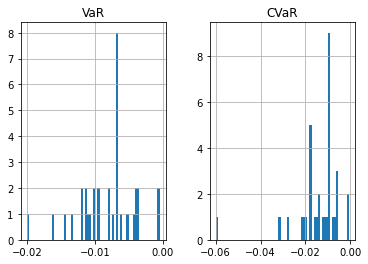

In [31]:
var_df.hist(bins=64)

In [32]:
var_df.describe()

,VaR,CVaR
count,34.000000,34.000000
mean,-0.008244,-0.014063
std,0.004199,0.010533
min,-0.019996,-0.059619
25%,-0.010957,-0.017619
50%,-0.007074,-0.010922
75%,-0.006328,-0.009071
max,-0.000470,-0.000720


# Export result

In [33]:
selected_pair_df

,left_symbol,right_symbol,cointegration,cointegration_test_period,correlation,alpha,beta,left_half_life,right_half_life,spread_half_life,left_hurst,right_hurst,left_VaR,left_CVaR,right_VaR,right_CVaR
35,USDNOK,NOKUSD,0.999980,3926,-0.986901,0.034895,-1.017268,-11198.898346,4666.712208,2.885596e+05,0.446939,0.422568,-0.011356,-0.021247,-0.013509,-0.027970
36,USDCNY,CNYUSD,0.999796,3465,-0.999412,-0.001807,-0.999223,-30444.586735,23883.045317,5.799698e+06,0.631809,0.635551,-0.003593,-0.005484,-0.003815,-0.005502
37,ZARUSD,INRUSD,0.999783,3932,0.796026,-3.869933,0.147223,401.229935,6969.504060,5.473006e+05,0.207094,0.511213,-0.016167,-0.059619,-0.005140,-0.007244
38,ZARUSD,USDINR,0.999673,3959,-0.798627,3.869098,-0.147442,401.229935,-6283.916349,3.813813e+02,0.207094,0.503010,-0.016167,-0.059619,-0.004366,-0.006429
39,USDNZD,SEKUSD,0.997444,3821,-0.886660,-1.754840,-1.146984,-7491.473959,5796.173602,-4.011837e+06,0.471632,0.460505,-0.009992,-0.015111,-0.011379,-0.019204
40,USDAUD,USDNOK,0.996808,3905,0.859351,1.820381,1.070854,-13545.781059,-11198.898346,5.360616e+01,0.452581,0.446939,-0.009329,-0.014251,-0.011356,-0.021247
41,NZDUSD,SEKUSD,0.996079,3661,0.906466,-1.752806,1.157699,5796.788117,5796.173602,-1.555277e+06,0.501694,0.460505,-0.010716,-0.016270,-0.011379,-0.019204
42,USDCHF,XAGUSD,0.995753,2711,-0.799933,2.753769,-4.451238,30791.098098,91420.910440,4.237454e+02,0.412084,0.523511,-0.006702,-0.009239,-0.019996,-0.031640
43,USDCHF,XAUUSD,0.995419,3121,-0.768328,7.182909,-3.555472,30791.098098,-5319.154031,5.251584e+02,0.412084,0.455717,-0.006702,-0.009239,-0.011916,-0.017570
44,CHFUSD,XAGUSD,0.994891,2737,0.822445,2.752931,4.566949,-224368.035511,91420.910440,3.802471e+02,0.413260,0.523511,-0.006782,-0.009221,-0.019996,-0.031640


In [34]:
selected_pair_df.to_csv(analysis_dir / 'pairs.csv', index=False)